<a href="https://colab.research.google.com/github/erinmcmahon26/Company-Bankruptcy-Prediction-Kaggle/blob/main/Company_Bankruptcy_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report 
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDClassifier
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [2]:
df_bank = pd.read_csv('https://raw.githubusercontent.com/erinmcmahon26/Company-Bankruptcy-Prediction-Kaggle/main/company_bankruptcy.csv')

In [3]:
#pip install imbalanced-learn

In [10]:
import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [5]:
y = df_bank['Bankrupt?']
x = df_bank.drop('Bankrupt?', axis=1)

In [6]:
scaler = StandardScaler()
x = scaler.fit_transform(x.astype(np.float64))

In [11]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)

In [37]:
x.shape

(13198, 95)

In [38]:
y.shape

(13198,)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = .2,
    random_state = 42)

accuracy score =  0.9276515151515151
Classification Report               precision    recall  f1-score   support

           0       0.97      0.88      0.92      1334
           1       0.89      0.98      0.93      1306

    accuracy                           0.93      2640
   macro avg       0.93      0.93      0.93      2640
weighted avg       0.93      0.93      0.93      2640



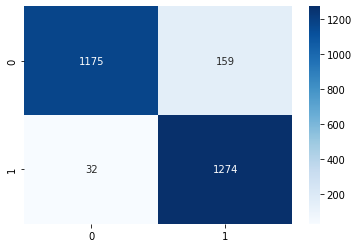

In [42]:
svc = SVC()
svc.fit(x_train, y_train)

sy_pred = svc.predict(x_test)
cm = confusion_matrix(y_test, sy_pred)

sva = accuracy_score(y_test, sy_pred)
print('accuracy score = ',accuracy_score(y_test, sy_pred))
print("Classification Report",classification_report(y_test, sy_pred))

sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression accuracy is : 0.8958333333333334
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1334
           1       0.88      0.91      0.90      1306

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



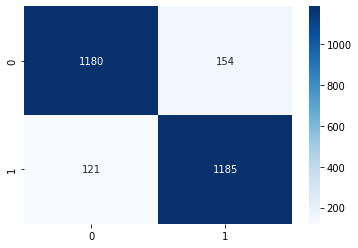

In [43]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
ly_pred= lr_model.predict(x_test)
report = classification_report(y_test,ly_pred)
print("-"*100)
print(report)
cm = confusion_matrix(y_test,lr_model.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

accuracy score =  0.718560606060606
Report:               precision    recall  f1-score   support

           0       0.92      0.49      0.64      1334
           1       0.65      0.95      0.77      1306

    accuracy                           0.72      2640
   macro avg       0.78      0.72      0.70      2640
weighted avg       0.78      0.72      0.70      2640



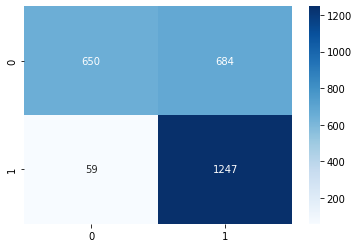

In [45]:
nb = GaussianNB()
nb.fit(x_train,y_train)

ny_pred = nb.predict(x_test)
cm = confusion_matrix(y_test,ny_pred)

nba = accuracy_score(y_test, ny_pred)
print('accuracy score = ', accuracy_score(y_test, ny_pred))
print("Report:", classification_report(y_test, ny_pred))

sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")